In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('3.data')

### Task A

In [3]:
moment1 = np.mean(data, axis=0)
moment1

6.496145618324817

In [4]:
moment2 = np.mean(np.square(data), axis=0)
moment2

46.554361807879815

In [5]:
data.shape

(10000,)

### Task B

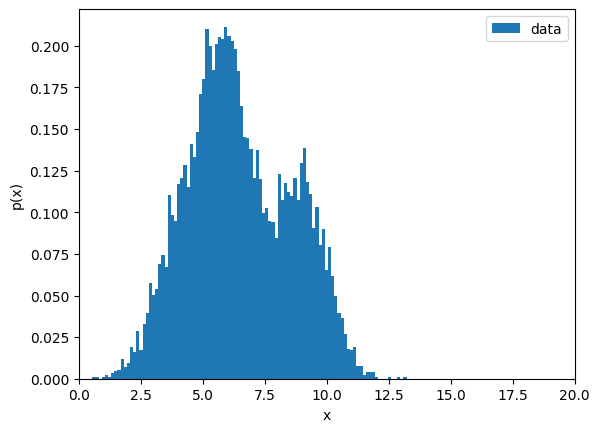

In [6]:
plt.hist(data, bins=100, density=True, label='data')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

In [7]:
hist = np.histogram(data, bins=100)
mode = hist[1][np.argmax(hist[0])]

### Task C

In [8]:
from scipy.optimize import fsolve
def mbin(z):
	n, p = z
	return [n*p - moment1, n**2*p**2 + n*p*(1-p) - moment2]

root = fsolve(mbin, [1, 1])

In [9]:
import math

print(mbin([math.floor(root[0]), root[1]]), mbin([math.ceil(root[0]), root[1]]))

[-0.23210155521104703, -3.1172406687999654] [0.09758497442651937, 1.3427877581671694]


Therefore, n should be rounded up for better fit.

In [10]:
root = [math.ceil(root[0]), root[1]]
print(root)

[20, 0.32968652963756684]


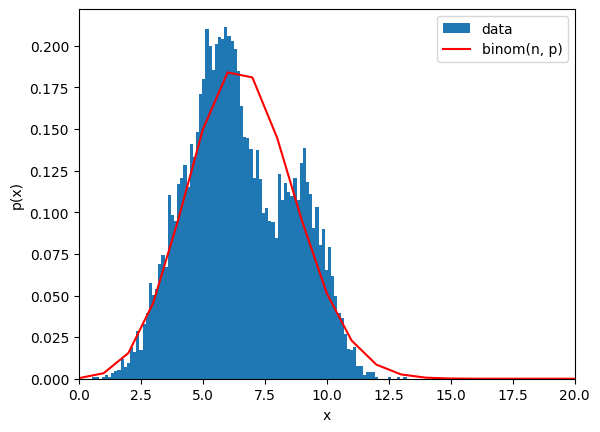

In [11]:
from scipy.stats import binom

plt.hist(data, bins=100, density=True, label='data')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel('p(x)')
x = np.linspace(start=0, stop=root[0], num=root[0] + 1)
plt.plot(x, binom.pmf(x, root[0], root[1]), 'r', label='binom(n, p)')
plt.legend()
plt.show()

### Task D

In [12]:
def mgamma(z):
	k, theta = z
	return [theta*k - moment1, theta**2*k*(k+1) - moment2]

root_g = fsolve(mgamma, [1, 1])
root_g

array([9.69120554, 0.67031347])

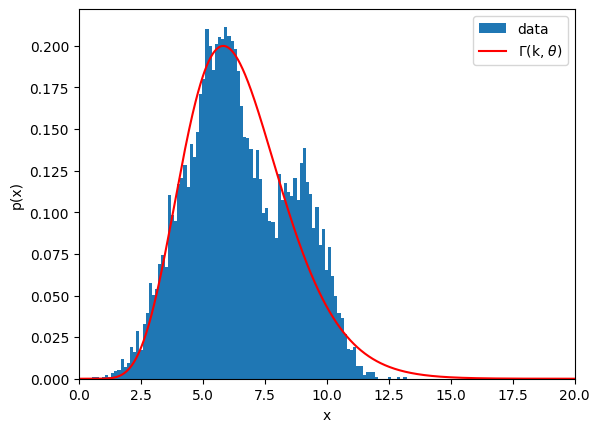

In [13]:
from scipy.stats import gamma

plt.hist(data, bins=100, density=True, label='data')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel('p(x)')
x = np.linspace(start=0, stop=root[0], num=1000)
plt.plot(x, gamma.pdf(x, root_g[0], 0, root_g[1]), 'r', label=r'$\Gamma$(k, $\theta$)')
plt.legend()
plt.show()

### Task F

In [14]:
moment3 = np.power(data, 3).mean()
moment3

360.56586952543273

In [15]:
moment4 = np.power(data, 4).mean()
moment4

2968.068491427333

In [16]:
def mnormal2(z):
	p1, p2, mu1, mu2 = z
	m1 = p1*mu1 + p2*mu2 - moment1
	m2 = p1*(mu1**2 + 1) + p2*(mu2**2 + 1) - moment2
	m3 = p1*(mu1**3 + 3*mu1) + p2*(mu2**3 + 3*mu2) - moment3
	m4 = p1*(mu1**4 + 6*mu1**2 + 3) + p2*(mu2**4 + 6*mu2**2 + 3) - moment4
	return [m1, m2, m3, m4]

root_normal = fsolve(mnormal2, [2, 1, 5, 8])
root_normal

array([0.61187403, 0.38264565, 5.12960769, 8.77436305])

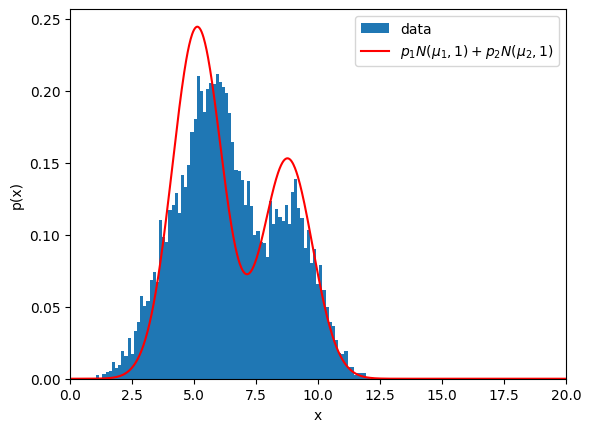

In [17]:
from scipy.stats import norm

plt.hist(data, bins=100, density=True, label='data')
plt.xlim(0, 20)
plt.xlabel('x')
plt.ylabel('p(x)')
x = np.linspace(start=0, stop=20, num=1000)
plt.plot(x, root_normal[0]*norm.pdf(x, root_normal[2], 1) + root_normal[1]*norm.pdf(x, root_normal[3], 1), 'r', label=r'$p_1N(\mu_1, 1) + p_2N(\mu_2, 1)$')
plt.legend()
plt.show()